# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
#reshaping y because the StandarScaler expects a 2D array
y = y.reshape(len(y),1) # reshape(num_rows, num_columns)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR

#using rbf kernel
regressor_svr = SVR(kernel='rbf')
regressor_svr.fit(X,y)

/Users/tebs/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [10]:
# predict the value 6.5. We first need to scale it because the model was trained with scaled values.
scaled_y = regressor_svr.predict(sc_X.transform([[6.5]]))

# Revert to original form of the value, without scaling.
y_pred = sc_y.inverse_transform(scaled_y.reshape(-1,1))

In [11]:
y_pred

array([[170370.0204065]])

## Visualising the SVR results

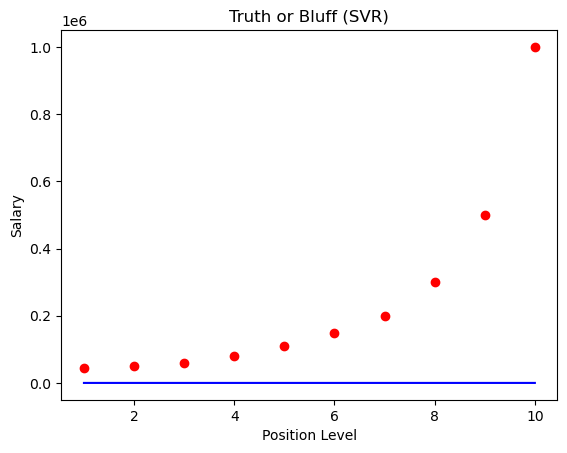

In [16]:
x_axis = sc_X.inverse_transform(X)
y_axis = sc_y.inverse_transform(y)

plt.scatter(x_axis, y_axis, color = 'red')
plt.plot(x_axis, regressor_svr.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show();

In [17]:
y_axis

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

## Visualising the SVR results (for higher resolution and smoother curve)